# Applicant Admission Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hypothesis Function for Logistic Regression - Sigmoid Function

def hypothesis(thetarg, x):
    return 1/(1 + np.exp(-np.dot(x,thetarg)))

In [3]:
# Cost function used to calculate the error between hypothetic and actual value over m training examples

def cost(x,y,thetarg,m):
    return float((1/m)*(-np.dot(y.T,np.log(hypothesis(thetarg,x))) - np.dot((1-y).T,np.log(1-hypothesis(thetarg,x)))))

In [4]:
# Gradient Descent method to minimize cost function in configurable alpha and iterations

def gradient_descent(x,y,thetarg,m):
    jvec=[]
    theta_history=[]
    for i in range(num_iterations):
        theta_history.append(list(thetarg[:, 0]))
        jvec.append(cost(x, y, thetarg, m))
        
        for j in range(len(thetarg)):
            thetarg[j] = thetarg[j] - (alpha/m)*np.sum((hypothesis(thetarg,x) - y) * np.array(x[:, j]).reshape(m, 1))
    return thetarg

In [5]:
# Predict function to get output from the classifier

def predict(final_theta,input_matrix):
    h = hypothesis(final_theta,input_matrix)
    pred = []
    for i in h:
        if i>0.5:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [27]:
# Function to get the accuracy of the classifier

def accuracy(prediction, decision):
    count = 0
    for i,j in zip(prediction,decision):
        if i == j:
            count = count+1
    return 100*(count/len(prediction))

### Setting Parameters for Logistic Regression

In [7]:
path = "/Users/akshatkumar/Downloads/machine-learning-ex2/ex2/ex2data1.txt"
num_iterations = 10000
alpha = 0.001

##### Input - Test Scores of Applicants 
##### Decision Label - Admission got or not
##### Predict - New Students get admission or not 

In [19]:
data = np.loadtxt(path, delimiter=',', usecols=[0, 1, 2], unpack=True)
X = np.transpose(np.array(data[:-1]))
inmatrix = np.insert(X, 0, 1, axis=1)
# Converting output to n dimensional vector
outmatrix = np.transpose(np.array(data[-1:]))

In [18]:
m = outmatrix.size
theta = np.zeros([inmatrix.shape[1], 1])

### Admission Decision Vizualisation with respect to Score1 and Score2

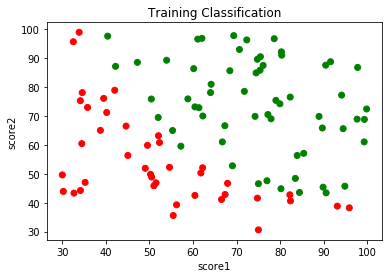

In [9]:
plt.title("Training Classification")
plt.xlabel("score1")
plt.ylabel("score2")
color= ['red' if l == 0 else 'green' for l in outmatrix]
plt.scatter(inmatrix[:,1],inmatrix[:,2],color=color)

### Running Gradient Descent for cost function convergence

In [10]:
final_theta = gradient_descent(inmatrix,outmatrix,theta,m)

### Prediction

In [13]:
predict_label = predict([[-25.16133593],[0.20623171],[0.20147164]],inmatrix)

### Accuracy of classifier

In [28]:
accuracy = accuracy(predict_label,outmatrix)
accuracy

89.0

### Predicted Data Vizualisation

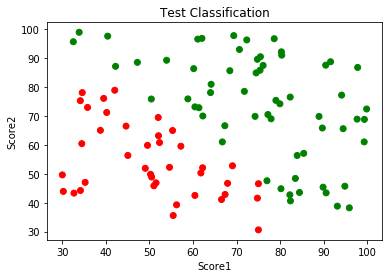

In [17]:
plt.title("Test Classification")
plt.xlabel("Score1")
plt.ylabel("Score2")
color= ['red' if l == 0 else 'green' for l in predict_label]
plt.scatter(inmatrix[:,1],inmatrix[:,2],color=color)